In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## AD Dataset

In [9]:
excelsheet = pd.ExcelFile('/anvil/projects/x-cis220051/corporate/molecular-stethoscope/Teams/Team-2/ClusterMarkers_1819ADcohort-Copy1.congregated_DR.xlsx')
TPMs = excelsheet.parse(excelsheet.sheet_names[-1])
TPMs = TPMs[~TPMs.Coeff.isna()]
df = pd.read_csv('AD-data.csv',index_col =0)
df = df.iloc[TPMs.gene_id.index.tolist(),:-6].T
df.head(5)

0          1           2          3          4    \
11174-r1-AD   40.167869   4.669515   91.808686  44.561230   3.803395   
11178-r1-AD   43.221009   8.401576   52.448546   8.633877   2.503695   
11182-r1-AD  102.123100   6.827512  105.386495  19.836541  10.826006   
11182-r2-AD   82.137419   9.261443   48.958301  21.810697   3.646693   
11186-r1-AD   59.941767  11.148535   32.223227   9.518698   7.922817   

                   5          6          7           8          9    ...  \
11174-r1-AD  66.791635   5.799236   3.288744  127.733824  44.774622  ...   
11178-r1-AD  41.581992   6.594785  19.603677   87.151829  21.784731  ...   
11182-r1-AD  40.062907   8.264297   4.945213   50.699569   2.506020  ...   
11182-r2-AD  66.856038   5.070640   5.765248   30.261764   0.000000  ...   
11186-r1-AD  17.588653  24.402275   6.824941   89.969242  18.856304  ...   

                   957        958       959        960       961        962  \
11174-r1-AD  51.490187   1.217589  0.000000  22.983553  3.966577  11.975046   
11178-r1-AD  27.656800  22.120278  4.710561  19.681111  5.691390  15.099606   
11182-r1-AD  23.422934  10.124321  0.668272  13.732990  0.935581  19.157131   
11182-r2-AD  20.236252   6.610355  4.908565   5.730518  1.238718  12.294565   
11186-r1-AD  50.468342  15.234445  6.010022   0.000000  1.358197  11.918180   

                    963          964        965         966  
11174-r1-AD   79.808535   586.689385   2.435177   30.615448  
11178-r1-AD   90.055599  1025.663329   8.659689   61.572838  
11182-r1-AD  150.695337   858.495631  17.196866  113.283243  
11182-r2-AD   83.364560   699.377835  19.587951   82.241610  
11186-r1-AD  101.977969   917.722489   7.786997   66.336612  

[5 rows x 967 columns]

#### Correlation Matrix

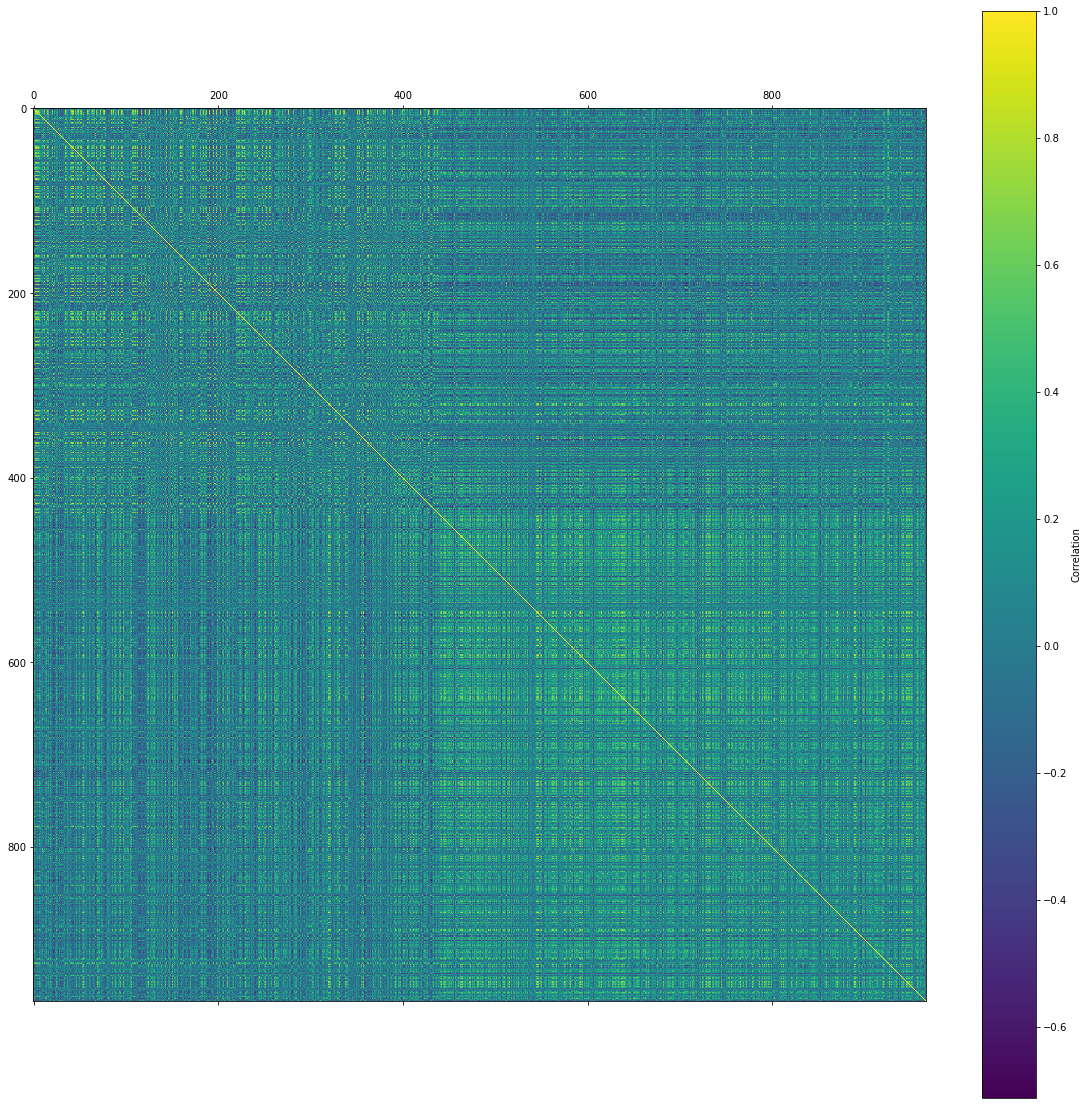

In [10]:
fig,ax = plt.subplots(figsize = (20,20))
cax = ax.matshow(df.corr())
cbar = fig.colorbar(cax)
cbar.set_label('Correlation')

c = df.corr()
c.to_csv('Correlation - AD.csv')

c = df.cov()
c.to_csv('Covariance - AD.csv')


In [11]:
corrs = df.corr().unstack().reset_index()
corrs.columns = ['x','y','V']

def getgene(i):
    return TPMs.gene_id[i]
corrs.x = corrs.x.apply(getgene)
corrs.y = corrs.y.apply(getgene)

corrs = corrs[corrs.V != 1]
top = corrs['V'].nlargest(10).index.tolist()

corrs.loc[top,:]

x                   y         V
122094  ENSG00000124731.12  ENSG00000186431.18  0.974478
243810  ENSG00000186431.18  ENSG00000124731.12  0.974478
82321    ENSG00000197405.7  ENSG00000124731.12  0.971905
121927  ENSG00000124731.12   ENSG00000197405.7  0.971905
82447    ENSG00000197405.7  ENSG00000186431.18  0.961888
243769  ENSG00000186431.18   ENSG00000197405.7  0.961888
122118  ENSG00000124731.12   ENSG00000188404.8  0.958271
267018   ENSG00000188404.8  ENSG00000124731.12  0.958271
243960  ENSG00000186431.18   ENSG00000188404.8  0.950385
267144   ENSG00000188404.8  ENSG00000186431.18  0.950385

In [12]:
top = corrs.V.nsmallest(10).index.tolist()

corrs.loc[top,:]

x                   y         V
386381  ENSG00000101290.13  ENSG00000149273.14 -0.712075
530315  ENSG00000149273.14  ENSG00000101290.13 -0.712075
386669  ENSG00000101290.13   ENSG00000146066.2 -0.693422
808811   ENSG00000146066.2  ENSG00000101290.13 -0.693422
144631  ENSG00000110934.10  ENSG00000149273.14 -0.692724
530065  ENSG00000149273.14  ENSG00000110934.10 -0.692724
346947  ENSG00000143363.15  ENSG00000154822.15 -0.690129
736245  ENSG00000154822.15  ENSG00000143363.15 -0.690129
346866  ENSG00000143363.15  ENSG00000141741.11 -0.689910
657918  ENSG00000141741.11  ENSG00000143363.15 -0.689910

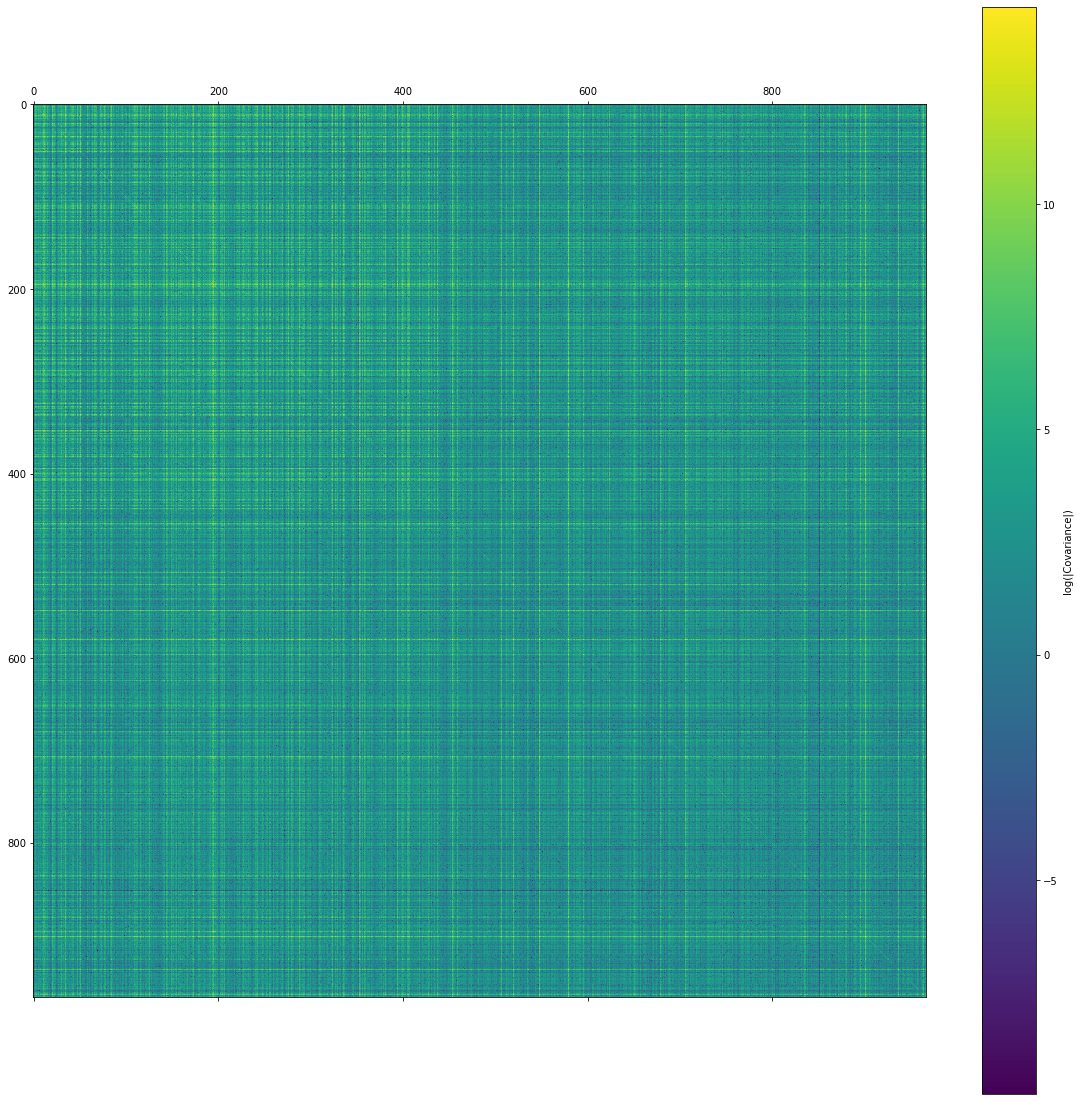

In [13]:
fig,ax = plt.subplots(figsize = (20,20))
cax = ax.matshow(np.log(np.abs(df.cov())))
cbar = fig.colorbar(cax)
cbar.set_label('log(|Covariance|)')


In [14]:
corrs = df.cov().unstack().reset_index()
corrs.columns = ['x','y','V']


def getgene(i):
    return TPMs.gene_id[i]
corrs.x = corrs.x.apply(getgene)
corrs.y = corrs.y.apply(getgene)

corrs = corrs[corrs.x != corrs.y]
top = corrs.V.nlargest(10).index.tolist()

corrs.loc[top,:]

x                   y             V
530495  ENSG00000149273.14  ENSG00000177954.11  1.291271e+06
560441  ENSG00000177954.11  ENSG00000149273.14  1.291271e+06
439597  ENSG00000118181.10  ENSG00000177954.11  7.353844e+05
560347  ENSG00000177954.11  ENSG00000118181.10  7.353844e+05
560599  ENSG00000177954.11  ENSG00000182899.14  6.169134e+05
683281  ENSG00000182899.14  ENSG00000177954.11  6.169134e+05
439566  ENSG00000118181.10  ENSG00000149273.14  6.138032e+05
530370  ENSG00000149273.14  ENSG00000118181.10  6.138032e+05
188918   ENSG00000132475.8  ENSG00000179820.15  5.347277e+05
341546  ENSG00000179820.15   ENSG00000132475.8  5.347277e+05

In [15]:
top = corrs.V.nsmallest(10).index.tolist()

corrs.loc[top,:]

x                   y              V
530817  ENSG00000149273.14   ENSG00000109272.3 -526106.151012
871815   ENSG00000109272.3  ENSG00000149273.14 -526106.151012
189466   ENSG00000132475.8   ENSG00000109272.3 -387121.903693
871462   ENSG00000109272.3   ENSG00000132475.8 -387121.903693
560794  ENSG00000177954.11   ENSG00000109272.3 -371699.872315
871846   ENSG00000109272.3  ENSG00000177954.11 -371699.872315
381577  ENSG00000166091.19  ENSG00000177954.11 -322035.469119
560287  ENSG00000177954.11  ENSG00000166091.19 -322035.469119
381546  ENSG00000166091.19  ENSG00000149273.14 -290379.263466
530310  ENSG00000149273.14  ENSG00000166091.19 -290379.263466

## NCI Plots

In [16]:
excelsheet = pd.ExcelFile('/anvil/projects/x-cis220051/corporate/molecular-stethoscope/Teams/Team-2/ClusterMarkers_1819ADcohort-Copy1.congregated_DR.xlsx')
TPMs = excelsheet.parse(excelsheet.sheet_names[-1])
TPMs = TPMs[~TPMs.Coeff.isna()]
df = pd.read_csv('NCI-data.csv',index_col =0)
df = df.iloc[TPMs.gene_id.index.tolist(),:-6].T
df.head(5)

0          1          2          3         4          5    \
17921-r1-NCI  30.269536  12.039150  52.116245   6.122572  1.167294  20.381869   
17922-r1-NCI  14.224502   8.799692  59.422922  15.299465  2.424915  14.636988   
17923-r1-NCI   7.123632  15.465508  39.056087   9.818223  2.013200  11.552673   
17924-r1-NCI  14.382305  12.250762  28.192460  14.741302  4.139681  13.114598   
17925-r1-NCI  34.784636  10.080862  51.095243  15.664979  3.330082  17.567883   

                   6          7          8          9    ...        957  \
17921-r1-NCI  4.280078  10.208101  69.659987  10.322541  ...  76.377650   
17922-r1-NCI  5.162319   5.849795  36.386227   0.000000  ...  67.760130   
17923-r1-NCI  8.238635   8.187015  63.100926   4.552930  ...  74.333552   
17924-r1-NCI  4.173337  12.475135  87.157668   2.804662  ...  55.487428   
17925-r1-NCI  1.042067   8.211938  47.187493   1.936885  ...  32.326718   

                    958       959        960       961        962         963  \
17921-r1-NCI  27.511518  4.131305  12.794458  1.029965  18.836921   81.607584   
17922-r1-NCI  10.937117  2.037429  17.399391  2.912398   8.549701   72.634960   
17923-r1-NCI  27.410497  1.455699  16.343057  4.336124  13.710411  115.939692   
17924-r1-NCI  24.781991  4.162118  15.571482  3.197314  17.119655  133.602867   
17925-r1-NCI   8.155304  4.077652  11.360791  3.624579  18.995062   78.494798   

                      964        965         966  
17921-r1-NCI  1476.501044  12.222255   46.497212  
17922-r1-NCI  1256.668548   5.899794   80.709677  
17923-r1-NCI  1419.254632  28.824899   60.912216  
17924-r1-NCI  1465.200167  12.419042   59.986105  
17925-r1-NCI  1361.006922  14.498318  124.436343  

[5 rows x 967 columns]

### Correlation

x                   y         V
530622  ENSG00000149273.14  ENSG00000182899.14  0.916592
683250  ENSG00000182899.14  ENSG00000149273.14  0.916592
530495  ENSG00000149273.14  ENSG00000177954.11  0.908407
560441  ENSG00000177954.11  ENSG00000149273.14  0.908407
401284   ENSG00000149761.8  ENSG00000062822.12  0.903982
915196  ENSG00000062822.12   ENSG00000149761.8  0.903982
346580  ENSG00000143363.15  ENSG00000166091.19  0.903086
381356  ENSG00000166091.19  ENSG00000143363.15  0.903086
439566  ENSG00000118181.10  ENSG00000149273.14  0.895354
530370  ENSG00000149273.14  ENSG00000118181.10  0.895354

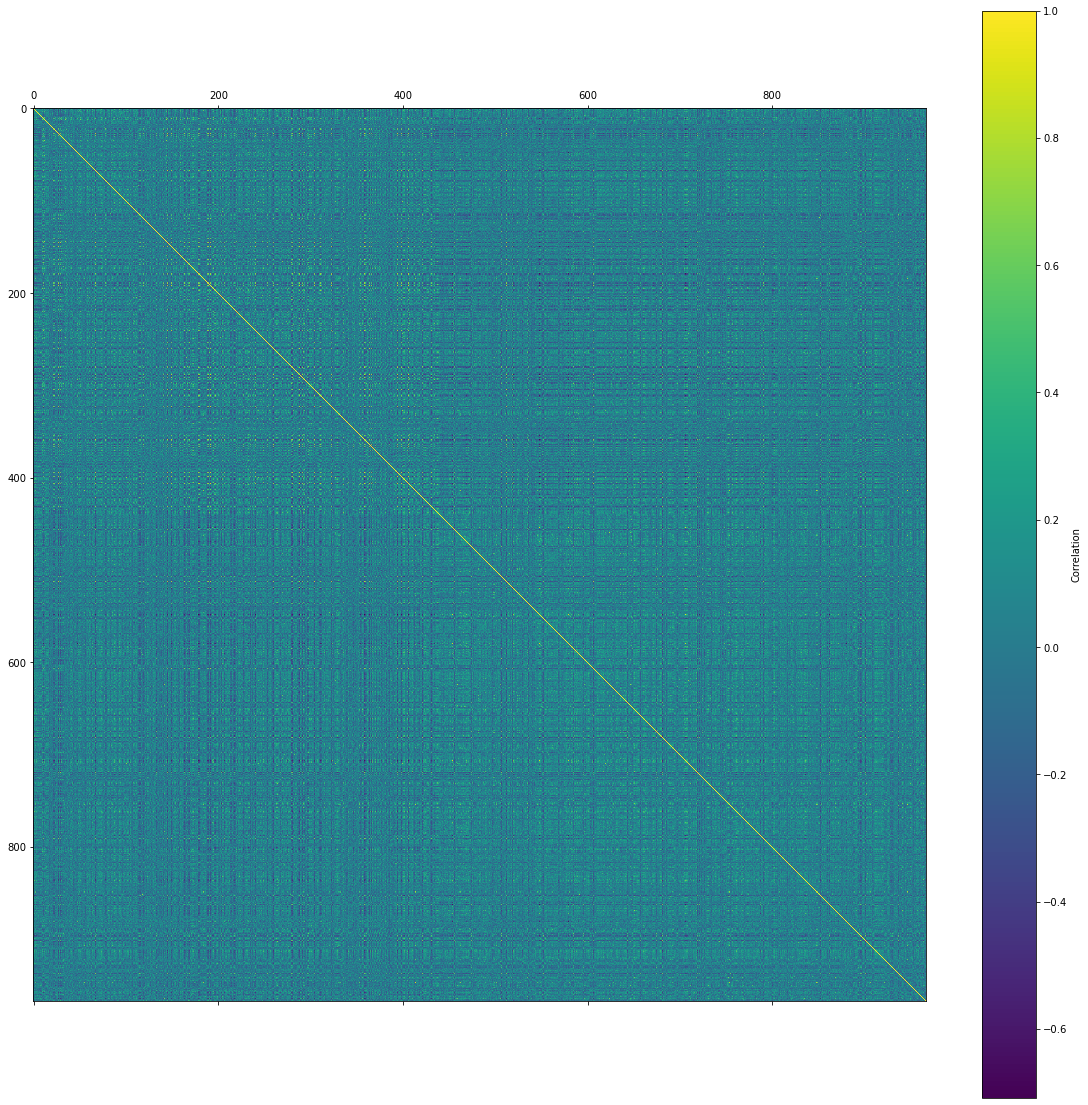

In [17]:
fig,ax = plt.subplots(figsize = (20,20))
cax = ax.matshow(df.corr())
cbar = fig.colorbar(cax)
cbar.set_label('Correlation')

c = df.corr()
c.to_csv('Correlation - NCI.csv')

c = df.cov()
c.to_csv('Covariance - NCI.csv')

corrs = df.corr().unstack().reset_index()
corrs.columns = ['x','y','V']

def getgene(i):
    return TPMs.gene_id[i]
corrs.x = corrs.x.apply(getgene)
corrs.y = corrs.y.apply(getgene)

corrs = corrs[corrs.V != 1]
top = corrs['V'].nlargest(10).index.tolist()

corrs.loc[top,:]

In [18]:
top = corrs.V.nsmallest(10).index.tolist()

corrs.loc[top,:]

x                   y         V
346734  ENSG00000143363.15  ENSG00000149273.14 -0.708434
530274  ENSG00000149273.14  ENSG00000143363.15 -0.708434
173641  ENSG00000146834.13  ENSG00000149273.14 -0.681309
530095  ENSG00000149273.14  ENSG00000146834.13 -0.681309
381546  ENSG00000166091.19  ENSG00000149273.14 -0.680098
530310  ENSG00000149273.14  ENSG00000166091.19 -0.680098
279044   ENSG00000105329.9  ENSG00000149273.14 -0.675236
530204  ENSG00000149273.14   ENSG00000105329.9 -0.675236
393150  ENSG00000088826.17  ENSG00000149273.14 -0.673510
530322  ENSG00000149273.14  ENSG00000088826.17 -0.673510

x                   y             V
530495  ENSG00000149273.14  ENSG00000177954.11  2.243115e+06
560441  ENSG00000177954.11  ENSG00000149273.14  2.243115e+06
439597  ENSG00000118181.10  ENSG00000177954.11  1.265770e+06
560347  ENSG00000177954.11  ENSG00000118181.10  1.265770e+06
560599  ENSG00000177954.11  ENSG00000182899.14  1.000183e+06
683281  ENSG00000182899.14  ENSG00000177954.11  1.000183e+06
439566  ENSG00000118181.10  ENSG00000149273.14  9.310017e+05
530370  ENSG00000149273.14  ENSG00000118181.10  9.310017e+05
530622  ENSG00000149273.14  ENSG00000182899.14  7.848629e+05
683250  ENSG00000182899.14  ENSG00000149273.14  7.848629e+05

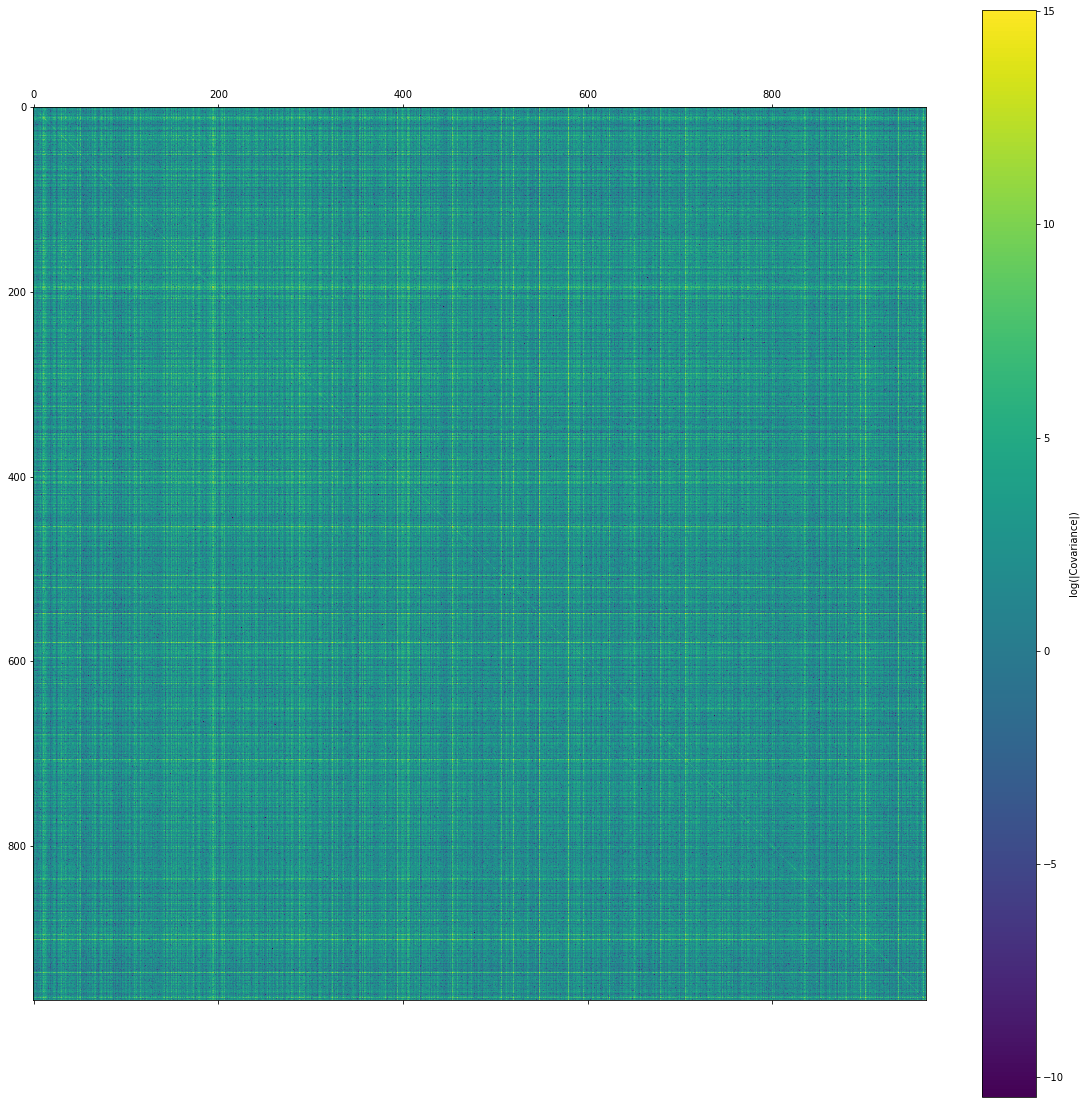

In [19]:
fig,ax = plt.subplots(figsize = (20,20))
cax = ax.matshow(np.log(np.abs(df.cov())))
cbar = fig.colorbar(cax)
cbar.set_label('log(|Covariance|)')


corrs = df.cov().unstack().reset_index()
corrs.columns = ['x','y','V']


def getgene(i):
    return TPMs.gene_id[i]
corrs.x = corrs.x.apply(getgene)
corrs.y = corrs.y.apply(getgene)

corrs = corrs[corrs.x != corrs.y]
top = corrs.V.nlargest(10).index.tolist()

corrs.loc[top,:]

In [20]:
top = corrs.V.nsmallest(10).index.tolist()

corrs.loc[top,:]

x                   y              V
560794  ENSG00000177954.11   ENSG00000109272.3 -889952.046424
871846   ENSG00000109272.3  ENSG00000177954.11 -889952.046424
530817  ENSG00000149273.14   ENSG00000109272.3 -879410.724776
871815   ENSG00000109272.3  ENSG00000149273.14 -879410.724776
439919  ENSG00000118181.10   ENSG00000109272.3 -405155.889370
871721   ENSG00000109272.3  ENSG00000118181.10 -405155.889370
503741  ENSG00000198034.10   ENSG00000109272.3 -398814.046798
871787   ENSG00000109272.3  ENSG00000198034.10 -398814.046798
560830  ENSG00000177954.11  ENSG00000100362.12 -359265.655914
906658  ENSG00000100362.12  ENSG00000177954.11 -359265.655914